In [ ]:
import pandas as pd

filepath_train = '/content/train.tsv'
filepath_test = '/content/test.tsv'

df = pd.read_csv(filepath_train,sep = '\t')
df_test = pd.read_csv(filepath_test,sep='\t')

In [ ]:
df.sample(5)

,PhraseId,SentenceId,Phrase,Sentiment
136996,136997,7409,to show that if you give a filmmaker an unlimi...,1
90534,90535,4713,'s rare for any movie to be as subtle and touc...,4
25220,25221,1152,Melanie,2
13996,13997,603,Otar,2
38650,38651,1842,complex enough to hold our interest,3


In [ ]:
df_train = df.sample(105000)

In [ ]:
#Creating a new column using Sentiment column

mapping = {
    0:'negative',
    1:'somewhat negative',
    2:'neutral',
    3:'somewhat positive',
    4:'positive'
}

df_train['Sentiment Phrase'] = df_train['Sentiment'].map(mapping)

In [ ]:
df_train.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment Phrase
137277,137278,7427,It 's not too racy,2,neutral
104891,104892,5539,Tedious Norwegian offering which somehow snagg...,1,somewhat negative
69867,69868,3552,a ship as leaky,1,somewhat negative
141355,141356,7667,with a large human tragedy,2,neutral
41126,41127,1971,because this movie makes his own look much bet...,1,somewhat negative
93699,93700,4886,a festival film that would have been better of...,1,somewhat negative
154705,154706,8461,"'s consistently surprising , easy to watch -- ...",3,somewhat positive
24757,24758,1128,slyly exquisite,3,somewhat positive
52027,52028,2567,A respectable but uninspired thriller that 's ...,2,neutral
96456,96457,5039,audacity and,1,somewhat negative


In [ ]:
sent_phrase_count = df_train['Sentiment'].value_counts

In [ ]:
df_train.isnull().sum()

PhraseId            0
SentenceId          0
Phrase              0
Sentiment           0
Sentiment Phrase    0
dtype: int64

In [ ]:
df_train.shape

(105000, 5)

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.shape

(105000, 5)

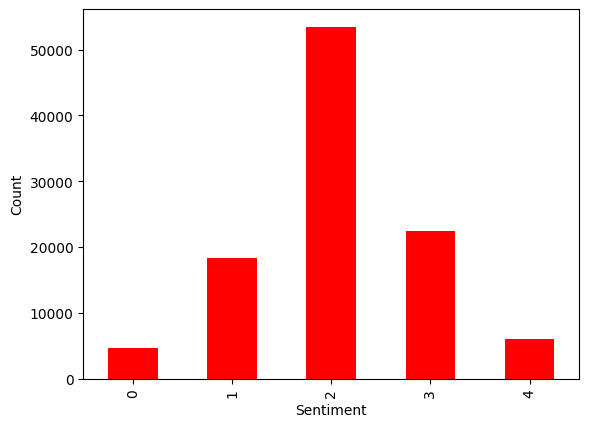

In [ ]:
import matplotlib.pyplot as plt
df_train['Sentiment'].value_counts().sort_index().plot(kind = 'bar',color='red')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Text Preprocessing

In [ ]:
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

def text_preprocessing(text_from_df):
  #Lowercasing
  text = text_from_df.lower()

  #remove punctuations
  text = re.sub(r'[^\w\s]', '', text)

  #remove stopwords
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear
  text = ' '.join(x)

  #Tokenize
  text = word_tokenize(text)

  #Stemming
  new_list = []
  ps = PorterStemmer()
  for word in text:
    new_list.append(ps.stem(word))
  text = " ".join(new_list)

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_preprocessing("Hi! I am ashish. How are you doing sir? Would you like to go running with me?")

'hi ashish sir would like go run'

In [ ]:
df_train['preprocessed_text'] = df_train['Phrase'].apply(text_preprocessing)
df_train.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment Phrase,preprocessed_text
116417,116418,6208,funnier version of the old Police Academy flic...,3,somewhat positive,funnier version old polic academi flick
38660,38661,1843,as a nifty plot line in Steven Soderbergh 's T...,1,somewhat negative,nifti plot line steven soderbergh traffic fail...
109657,109658,5810,'s almost impossible,2,neutral,almost imposs
39459,39460,1884,'s nowhere near as exciting as either .,1,somewhat negative,nowher near excit either
143251,143252,7776,a stunning fusion of music and images,4,positive,stun fusion music imag
51800,51801,2555,see why people thought I was too hard on `` Th...,1,somewhat negative,see peopl thought hard mothman propheci
111737,111738,5930,exotic locales,2,neutral,exot local
29785,29786,1381,plumbs,2,neutral,plumb
58778,58779,2964,The fluid motion,2,neutral,fluid motion
117869,117870,6295,"Not the best Herzog perhaps , but unmistakably...",2,neutral,best herzog perhap unmistak herzog


In [ ]:
#Normalize Sentiment column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = df_train['Sentiment'].values.reshape(-1,1)
scaler.fit(y)
y_scaled= scaler.transform(y)
y_scaled

array([[1.  ],
       [0.25],
       [0.75],
       ...,
       [0.5 ],
       [0.5 ],
       [0.5 ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train['preprocessed_text'].values,df_train['Sentiment'].values,test_size=0.2,random_state=43)

In [ ]:
X_train.shape

(84000,)

In [ ]:
X_test.shape

(21000,)

In [ ]:
X_test

array(['rape suspect murder', 'realli surpris', 'bar 3', ...,
       'lifeaffirm vulgar mean', 'classic whale',
       'problem difficult movi'], dtype=object)

In [ ]:
y_train

array([3, 2, 2, ..., 3, 1, 2])

#Vectorization: Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Create Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(binary = False)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform on testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.toarray().shape

(84000, 11783)

In [ ]:
X_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_tfidf.toarray().shape

(21000, 11783)

In [ ]:
X_test_tfidf.toarray()[5]

array([0., 0., 0., ..., 0., 0., 0.])

Model building

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
def visuals(model,y_pred):
  accuracy = accuracy_score(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred)
  ps  = precision_score(y_test,y_pred,average='weighted')
  print(f"********{model}***********")
  print("accuracy")
  print(accuracy)
  print("Confusion Matrix")
  print(cm)
  print("Precision Score")
  print(ps)

In [ ]:
g_model = GaussianNB()
g_model.fit(X_train_tfidf.toarray(),y_train)
y_pred = g_model.predict(X_test_tfidf.toarray())
visuals('gaussianNB',y_pred)

********gaussianNB***********
accuracy
0.1956190476190476
Confusion Matrix
[[ 671  157   31   17   72]
 [1796  945  129  207  588]
 [2798 1334  651 1317 4577]
 [ 494  213  125  842 2821]
 [  38   12   22  144  999]]
Precision Score
0.4904044529637364


In [ ]:
m_model = MultinomialNB()
m_model.fit(X_train_tfidf.toarray(),y_train)
y_pred = m_model.predict(X_test_tfidf.toarray())
visuals('Multinomial',y_pred)

********Multinomial***********
accuracy
0.5730952380952381
Confusion Matrix
[[  28  347  548   25    0]
 [  17  853 2696   97    2]
 [   3  434 9565  668    7]
 [   0   52 2864 1552   27]
 [   0    3  492  683   37]]
Precision Score
0.5544597218967028


In [ ]:
b_model = BernoulliNB()
b_model.fit(X_train_tfidf.toarray(),y_train)
y_pred = b_model.predict(X_test_tfidf.toarray())
visuals('Bernoulli',y_pred)

********Bernoulli***********
accuracy
0.5968095238095238
Confusion Matrix
[[ 199  427  287   31    4]
 [ 170 1298 1962  198   37]
 [  73  669 9101  760   74]
 [  22  201 2316 1700  256]
 [   4   20  315  641  235]]
Precision Score
0.568497202952863


Testing

In [ ]:
preprocessed_text = text_preprocessing("I think the move was fun")


In [ ]:
vectorize_text = tfidf_vectorizer.transform([preprocessed_text])
vectorize_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
prediction = b_model.predict(vectorize_text.toarray())
prediction[0]

2

Pickeling files

In [ ]:
import pickle
pickle.dump(b_model,open('bmodel.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf.pkl','wb'))